<a href="https://colab.research.google.com/github/suvendu77/AnamolyWorkShop/blob/main/Tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

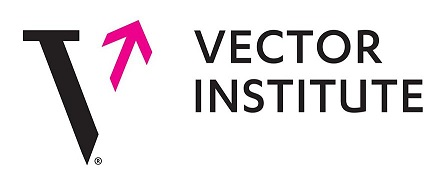

### **Welcome to the Anomaly Detection Workshop!**

Instructor: Mehdi Ataei
| Tutorial Developer: Sareh Soltani
| Teacher Assistants: Omar Imran and Sareh Soltani
| Technical Education Specialist: Flora Wan

### ***Never stop learning!***

For the best experience, change the runtime to use a GPU accelerator. You can use a free GPU on Colab by selecting:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**


# Anomaly Detection for Image Data

## Case Study: Image Anomaly Detection

Detecting anomalies in images is a popular application of anomaly detection.

In this tutorial, we will go over a popular dataset known as the "[MVTec Anomaly Detection](https://www.mvtec.com/company/research/datasets/mvtec-ad)" dataset. MVTec is a dataset for benchmarking anomaly detection methods with a focus on industrial inspection.

Here are some features of the dataset:

*   Contains over 5000 high-resolution images.
*   Images are divided into fifteen distinct object and texture categories such as bottle, cable, carpet, wood, leather and pill.
*   Each category consists of two sets: training images (defect-free) and test images (with defects and without defects).


Some example of the MVTec dataset:
<br>

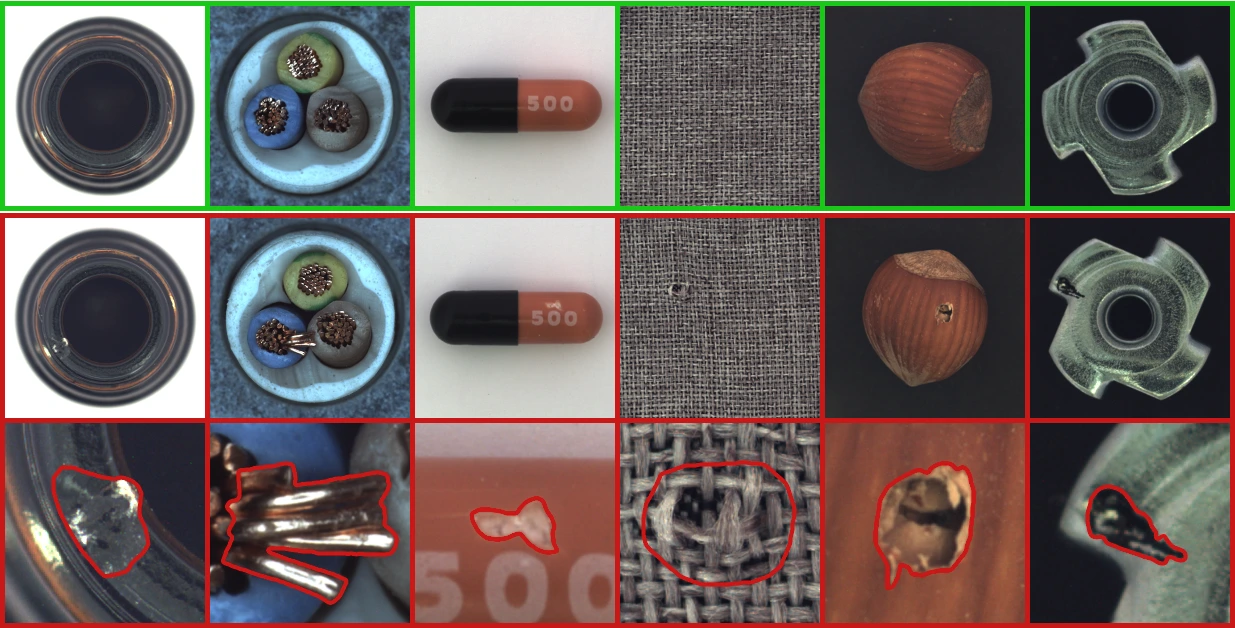

## **Anomalib**:

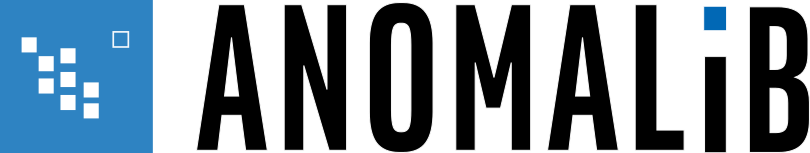

Anomalib is a deep learning library for developing and deploying state-of-the-art anomaly detection algorithms for benchmarking on both public and private datasets.


# Key features:

*   The largest public collection of ready-to-use deep learning anomaly detection algorithms and benchmark datasets.
*   Provides a set of tools that facilitate the development and implementation of Anomaly Detection models.
*   Focus on image-based anomaly detection or anomalous pixel regions within images in a dataset.



# **Getting Started**

### Install Anomalib via PyPI

In [ ]:
!pip install anomalib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.0/345.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━

 Now let's verify the working directory.

In [ ]:
# Change PATH to working directory on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/Anomaly Detection Workshop/anomalib/"

## Model

Currently, there are **13** anomaly detection models available in `anomalib` library. Namely,

*   [CFA](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/cfa)
*   [PADIM](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/padim)
*   [CFlow](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/cflow)
*   [DFKDE](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/dfkde)
*   [DFM](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/dfm)
*   [DRAEM](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/draem)
*   [EfficientAd](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/efficient_ad)
*   [FastFlow](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/fastflow)
*   [GANomaly](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/ganomaly)
*   [PatchCore](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/patchcore)
*   [Reverse Distillation](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/reverse_distillation)
*   [STFPM](https://github.com/openvinotoolkit/anomalib/tree/main/src/anomalib/models/stfpm)


### In this tutorial, we'll be using Padim.

# PaDiM: A Patch Distribution Modeling Framework for Anomaly Detection


* Patch-based algorithm relying on pre-trained CNN feature extractor.
* Breaks image into patches, extracts embeddings using different layers.
* Concatenates activation vectors for diverse semantic levels.
* Encodes fine-grained and global contexts in embeddings.
* Reduces dimensions of embedding vectors to mitigate redundancy.
* Generates multivariate Gaussian distribution for each patch embedding.
* Distribution calculated across entire training batch.
* Inference uses Mahalanobis distance to score test image patches.
* Uses inverse of covariance matrix from training for Mahalanobis distance.
* Anomaly map formed from Mahalanobis distance scores.
* Higher scores in anomaly map indicate anomalous regions.

### Architecture:
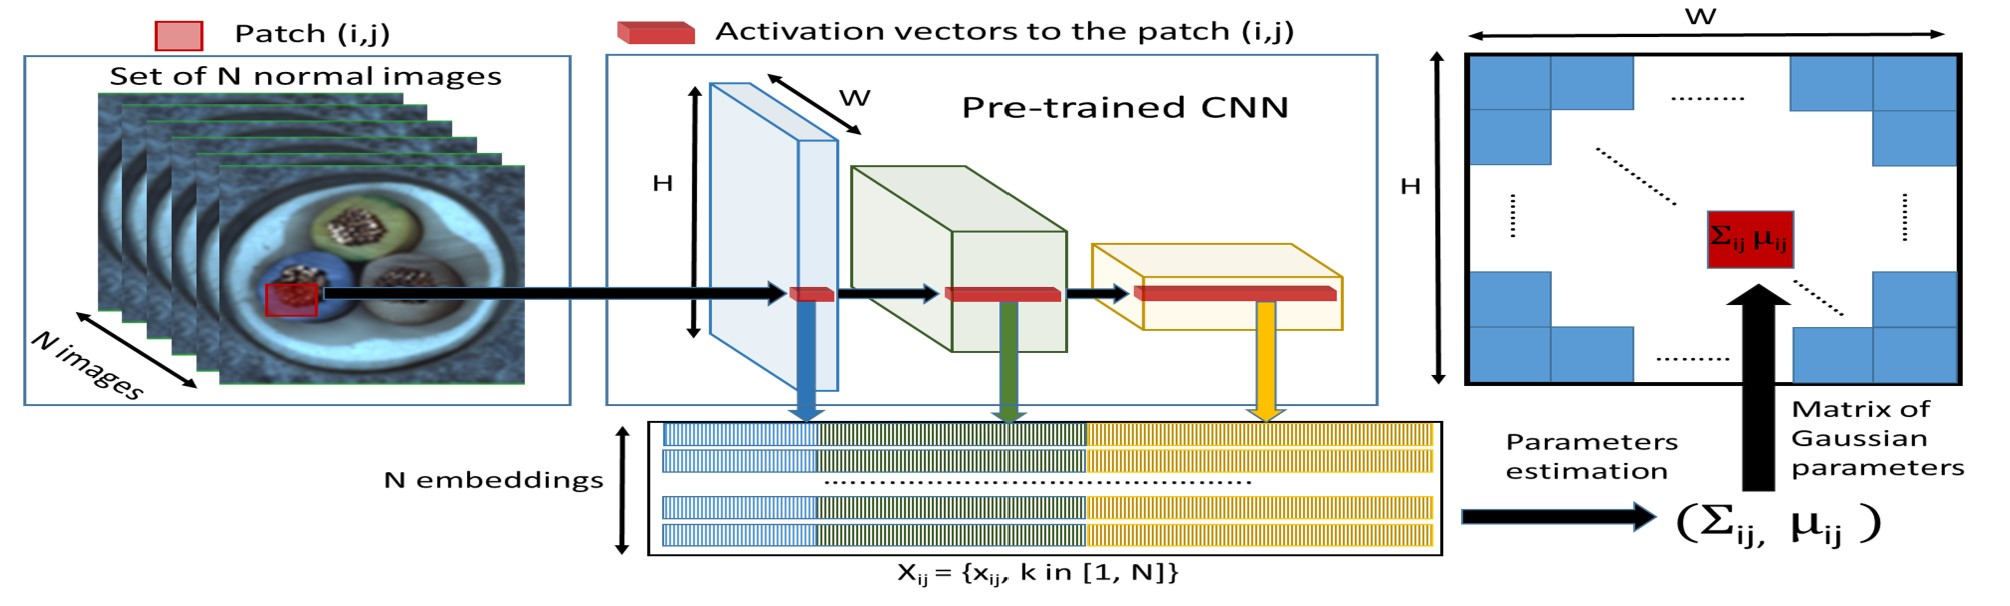


## Imports

In [ ]:
# Install OpenVINO
! pip install OpenVINO

In [ ]:
! pip install wandb

In [ ]:
# Import libraries
import os
from pathlib import Path
from typing import Any
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from pytorch_lightning import Trainer
from torchvision.transforms import ToPILImage
from __future__ import annotations

from anomalib.config import get_configurable_parameters
from anomalib.data import get_datamodule
from anomalib.data.utils import read_image
from anomalib.deploy import OpenVINOInferencer
from anomalib.models import get_model
from anomalib.pre_processing.transforms import Denormalize
from anomalib.utils.callbacks import LoadModelCallback, get_callbacks

To use wandb logger install it using `pip install wandb`


In [ ]:
! pip install defusedxml requests networkx nncf openvino-dev onnx

## Configuration
Training a model on a specific dataset requires further configuration. Each model has its own configuration file, named config.yaml. It contains data, model and training configurable parameters.


In this tutorial, we use [Padim](https://arxiv.org/pdf/2011.08785.pdf) model. Now, let's get its config path from the respected folder and take a quick look at it.

In [ ]:
CONFIG_PATH = PATH + "/src/anomalib/models/padim/config.yaml"
with open(file=CONFIG_PATH, mode="r", encoding="utf-8") as file:
    print(file.read())

dataset:
  name: mvtec
  format: mvtec
  path: ./datasets/MVTec
  category: bottle
  task: segmentation
  train_batch_size: 32
  eval_batch_size: 32
  num_workers: 8
  image_size: 256 # dimensions to which images are resized (mandatory)
  center_crop: null # dimensions to which images are center-cropped after resizing (optional)
  normalization: imagenet # data distribution to which the images will be normalized: [none, imagenet]
  transform_config:
    train: null
    eval: null
  test_split_mode: from_dir # options: [from_dir, synthetic]
  test_split_ratio: 0.2 # fraction of train images held out testing (usage depends on test_split_mode)
  val_split_mode: same_as_test # options: [same_as_test, from_test, synthetic]
  val_split_ratio: 0.5 # fraction of train/test images held out for validation (usage depends on val_split_mode)
  tiling:
    apply: false
    tile_size: null
    stride: null
    remove_border_count: 0
    use_random_tiling: False
    random_tile_count: 16

model:
  nam

We use get_configurable_parameter function to read the configs from the path and return them in a dictionary. Here, we use the default config file that comes with Padim implementation.

In [ ]:
# pass the config file to model, callbacks and datamodule
config = get_configurable_parameters(config_path=CONFIG_PATH)

/usr/local/lib/python3.10/dist-packages/anomalib/config/config.py:275: UserWarning: config.project.unique_dir is set to False. This does not ensure that your results will be written in an empty directory and you may overwrite files.
  warn(


## Set up Dataset: MVTec AD
### DataModule


We could import the MVtec AD dataset using its specific datamodule implemented in anomalib.

In [ ]:
datamodule = get_datamodule(config)
datamodule.prepare_data()  # Downloads the dataset if it's not in the specified `root` directory
datamodule.setup()  # Create train/val/test/prediction sets.
i, data = next(enumerate(datamodule.val_dataloader()))

mvtec: 5.26GB [04:47, 18.3MB/s]                            
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Training

### Prepare Model and Callbacks

Now, the config file is updated as we want. We can now start model training with it.

In addition to the training, we would like to perform inference using OpenVINO. Therefore we will set the export configuration to openvino so that anomalib would export the trained model to the openvino format.

In [ ]:
# Set the export-mode to OpenVINO to create the OpenVINO IR model.
config.optimization.export_mode = "openvino"

# Get the model and callbacks
model = get_model(config)
callbacks = get_callbacks(config)

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
# start training
trainer = Trainer(**config.trainer, callbacks=callbacks)
trainer.fit(model=model, datamodule=datamodule)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(limit_train_batches=1.0)` was configured so 100% of the batches per epoch will be used..
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(limit_test_batches=1.0)` was configured so 100% of the batches will be used..
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(limit_predict_batches=1.0)` was configured so 100% of the batches will be used..
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch.

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/optimization/optimizer_loop.py:138: UserWarning: `training_step` returned `None`. If this was on purpose, ignore this warning...
  self.warning_cache.warn("`training_step` returned `None`. If this was on purpose, ignore this warning...")


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.10/dist-packages/torch/onnx/_internal/jit_utils.py:306: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._jit_pass_onnx_node_shape_type_inference(node, params_dict, opset_version)
/usr/local/lib/python3.10/dist-packages/torch/onnx/utils.py:689: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._jit_pass_onnx_graph_shape_type_inference(
/usr/local/lib/python3.10/dist-packages/torch/onnx/utils.py:1186: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



# Validation

In [ ]:
# load best model from checkpoint before evaluating
load_model_callback = LoadModelCallback(weights_path=trainer.checkpoint_callback.best_model_path)
trainer.callbacks.insert(0, load_model_callback)
test_results = trainer.test(model=model, datamodule=datamodule)

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `ROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9960317015647888     │
│       image_F1Score       │    0.9921259880065918     │
│        pixel_AUROC        │    0.9833223819732666     │
│       pixel_F1Score       │    0.7309265732765198     │
└───────────────────────────┴───────────────────────────┘

## OpenVINO Inference
Now that we trained and tested a model, we could check a single inference result using OpenVINO inferencer object. This will demonstrate how a trained model could be used for inference.

### Load a Test Image

Let's read an image from the test set and perform inference using OpenVINO inferencer.

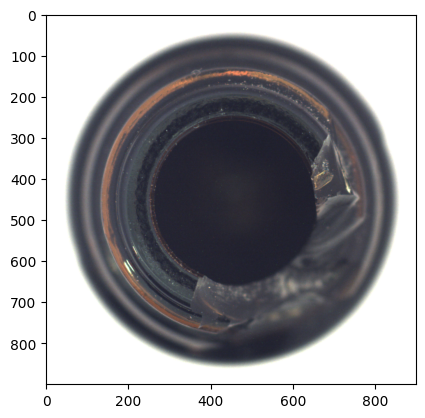

In [ ]:
image = read_image(path="/content/drive/MyDrive/Anomaly Detection Workshop/anomalib/000.png")
plt.imshow(image)

### Load the OpenVINO Model



By default, the output files are saved into results directory. Let's check where the OpenVINO model is stored.

In [ ]:
output_path = Path(config["project"]["path"])
print(output_path)

results/padim/mvtec/bottle/run


In [ ]:
openvino_model_path = output_path / "weights" / "openvino" / "model.bin"
metadata = output_path / "weights" / "openvino" / "metadata.json"
print(openvino_model_path.exists(), metadata.exists())

True True


In [ ]:
inferencer = OpenVINOInferencer(
    path=openvino_model_path,  # Path to the OpenVINO IR model.
    metadata=metadata,  # Path to the metadata file.
    device="CPU",  # We would like to run it on an Intel CPU.
)

### Perform Inference
Predicting an image using OpenVINO inferencer is as simple as calling `predict` method.

In [ ]:
predictions = inferencer.predict(image=image)

where predictions contain any relevant information regarding the task type. For example, predictions for a segmentation model could contain image, anomaly maps, predicted scores, labels or masks.

Visualizing Inference Results

In [ ]:
print(predictions.pred_score, predictions.pred_label)

0.7021568031990204 True


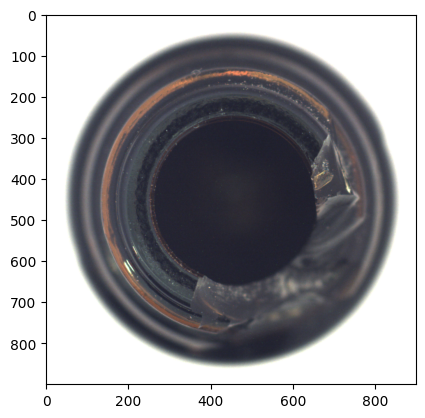

In [ ]:
# Visualize the original image
plt.imshow(predictions.image)

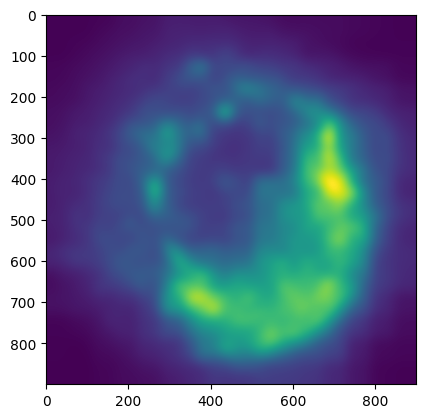

In [ ]:
# Visualize the raw anomaly maps predicted by the model.
plt.imshow(predictions.anomaly_map)

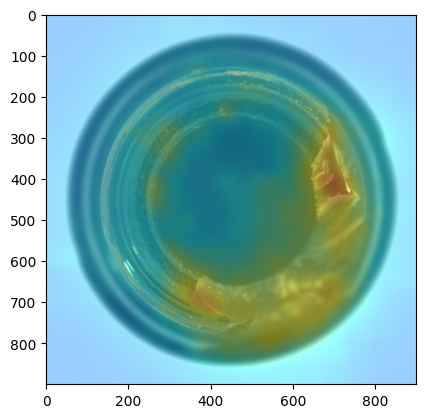

In [ ]:
# Visualize the heatmaps, on which raw anomaly map is overlayed on the original image.
plt.imshow(predictions.heat_map)

# Custom Dataset


It is also possible to train on a custom folder dataset. To do so, data section in config.yaml is to be modified as follows:


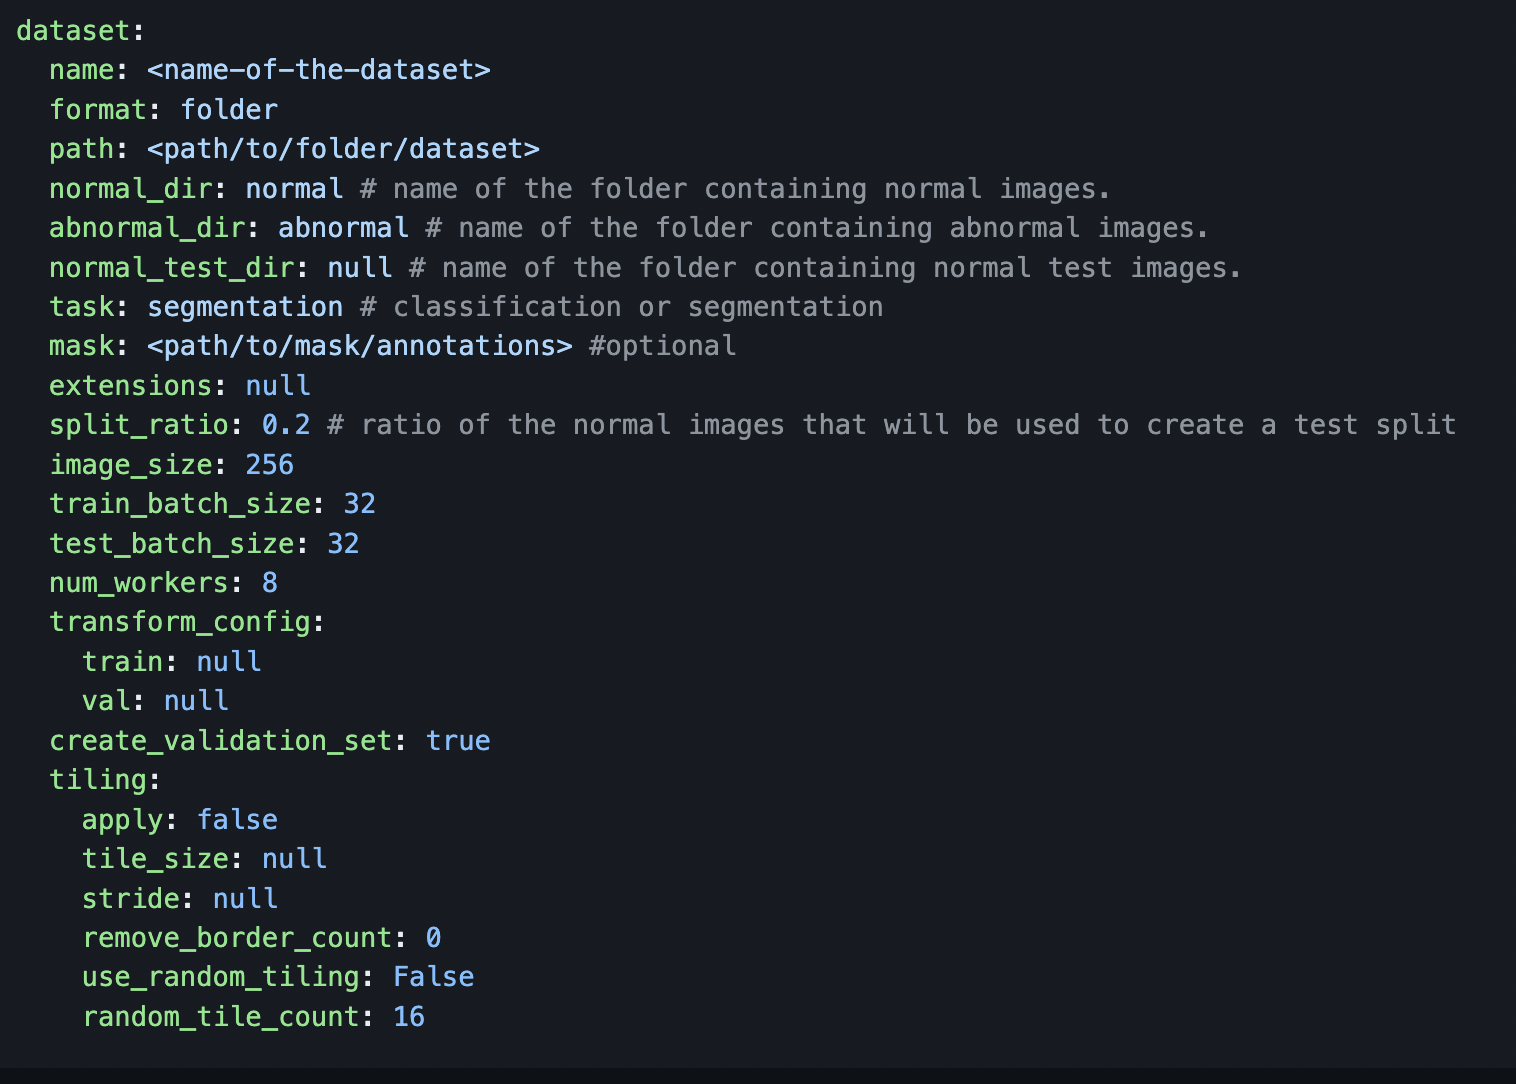